In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [2]:
# load raw data
xdat = np.loadtxt('xvals.dat')
ydat = np.loadtxt('yvals.dat')

In [3]:
# use k-fold cross-validation to fit 
# the linear Support Vector Classifier
# for different values of C; performance
# metric is accuracy, which is the default
# score given by SVC()
clf = SVC(kernel='linear')
Clist = np.logspace(-4,6,num=6) # note we are using the default log base 10

# (Note: n_jobs has been added to speed up calculations via parallelization, 
# you may adjust this based on your processor or default to 1; 
# verbose has also been added to print out information while the function is running.
train_scores, valid_scores = validation_curve(clf, xdat, ydat, param_name='C', param_range=Clist, cv=5, n_jobs=4, verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   47.6s finished


In [4]:
# compute the mean training and validation errors over k folds for each C
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

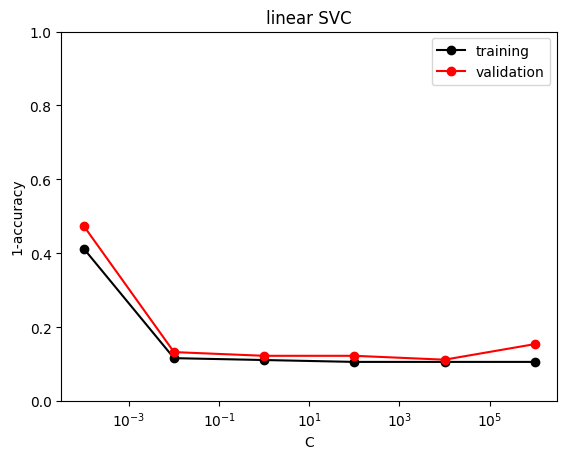

In [5]:
# plot training and validation error as a function of C
# (Note: the validation error is NOT the test error,
# which should be computed on a different test set after 
# model selection.)
fig, ax = plt.subplots()
ax.plot(Clist, 1-train_scores_mean, 'k-o', label='training')
ax.plot(Clist, 1-valid_scores_mean, 'r-o', label='validation')
ax.set(xlabel='C', ylabel='1-accuracy', xscale='log', ylim=[0,1], title='linear SVC')
ax.legend(loc='best')

In [6]:
print(Clist)

[1.e-04 1.e-02 1.e+00 1.e+02 1.e+04 1.e+06]


In [7]:
print(1-valid_scores_mean)

[0.47368421 0.13263158 0.12263158 0.12263158 0.11210526 0.15421053]
